# Построение модели для определения достопримечательности

In [ ]:
import matplotlib.pyplot as plt

from transformers import pipeline

## SigLIP

In [ ]:
image_classifier = pipeline(task="zero-shot-image-classification", model="google/siglip-base-patch16-256-i18n")

In [ ]:
outputs = image_classifier(images[0], candidate_labels=texts)
outputs = [{"score": round(output["score"], 4), "label": output["label"] } for output in outputs]
print(outputs)

[{'score': 0.0541, 'label': 'stadiums'}, {'score': 0.013, 'label': 'sport'}, {'score': 0.0008, 'label': 'other_buildings_and_structures'}, {'score': 0.0002, 'label': 'railway_stations'}, {'score': 0.0002, 'label': 'urban_environment'}, {'score': 0.0001, 'label': 'monuments'}, {'score': 0.0001, 'label': 'gardens_and_parks'}, {'score': 0.0001, 'label': 'other_hotels'}, {'score': 0.0001, 'label': 'view_points'}, {'score': 0.0001, 'label': 'concert_halls'}, {'score': 0.0001, 'label': 'architecture'}, {'score': 0.0001, 'label': 'other'}, {'score': 0.0001, 'label': 'interesting_places'}, {'score': 0.0001, 'label': 'bridges'}, {'score': 0.0, 'label': 'industrial_facilities'}, {'score': 0.0, 'label': 'opera_houses'}, {'score': 0.0, 'label': 'cultural'}, {'score': 0.0, 'label': 'historic_architecture'}, {'score': 0.0, 'label': 'historic_object'}, {'score': 0.0, 'label': 'other_bridges'}, {'score': 0.0, 'label': 'nature_reserves'}, {'score': 0.0, 'label': 'accomodations'}, {'score': 0.0, 'label'

In [ ]:
outputs.sort(key=lambda x: x['score'], reverse=True)

top_5_outputs = outputs[:5]

print(top_5_outputs)

[{'score': 0.0541, 'label': 'stadiums'}, {'score': 0.013, 'label': 'sport'}, {'score': 0.0008, 'label': 'other_buildings_and_structures'}, {'score': 0.0002, 'label': 'railway_stations'}, {'score': 0.0002, 'label': 'urban_environment'}]


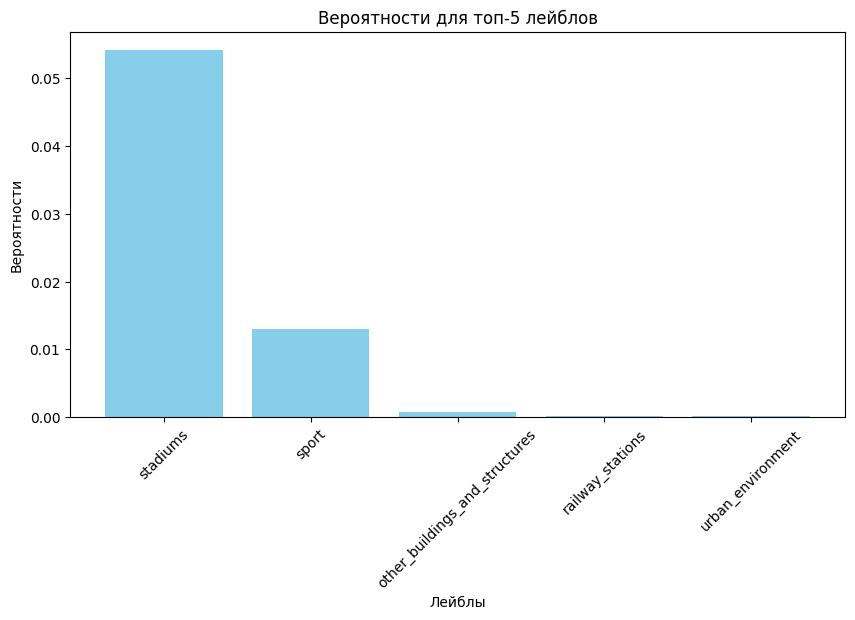

In [ ]:
# Получаем список вероятностей и лейблов из top_5_outputs
probabilities = [output["score"] for output in top_5_outputs]
labels = [output["label"] for output in top_5_outputs]

# Построение гистограммы
plt.figure(figsize=(10, 5))
plt.bar(labels, probabilities, color='skyblue')
plt.xlabel('Лейблы')
plt.ylabel('Вероятности')
plt.title('Вероятности для топ-5 лейблов')
plt.xticks(rotation=45)
plt.show()